In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gdown
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)
import jdatetime

In [ ]:
!gdown --folder https://drive.google.com/drive/folders/1RZJdNpCfbMt2SB_kfWsxQgOk5LeuV7lw

Due to the memory limitations, the data was loaded in chunks of 200000 rows which are concatenated at the end, resulting in the "divar" dataframe with 1000000 records.

In [ ]:
chunks = pd.read_csv("Divar Dataset/Divar.csv", chunksize=200000)
divar = pd.concat(chunks, ignore_index=True)

In [3]:
divar

,Unnamed: 0,cat2_slug,cat3_slug,city_slug,neighborhood_slug,created_at_month,user_type,description,title,rent_mode,...,property_type,regular_person_capacity,extra_person_capacity,cost_per_extra_person,rent_price_on_regular_days,rent_price_on_special_days,rent_price_at_weekends,location_latitude,location_longitude,location_radius
0,0,temporary-rent,villa,karaj,mehrshahr,2024-08-01 00:00:00,مشاور املاک,۵۰۰متر\n۲۰۰متر بنا دوبلکس\n۳خواب\nاستخر آبگرم ...,باغ ویلا اجاره روزانه استخر داخل لشکرآباد سهیلیه,NaN,...,NaN,4.0,6,350000.0,1500000.0,3.500000e+09,3500000.0,35.811684,50.936600,500.0
1,1,residential-sell,apartment-sell,tehran,gholhak,2024-05-01 00:00:00,مشاور املاک,دسترسی عالی به مترو و شریعتی \nمشاعات تمیز \nب...,۶۰ متر قلهک فول امکانات,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0
2,2,residential-rent,apartment-rent,tehran,tohid,2024-10-01 00:00:00,NaN,تخلیه پایان ماه,آپارتمان ۳ خوابه ۱۳۲ متر,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.703865,51.373459,NaN
3,3,commercial-rent,office-rent,tehran,elahiyeh,2024-06-01 00:00:00,NaN,فرشته تاپ لوکیشن\n۹۰ متر موقعیت اداری\nیک اتاق...,فرشته ۹۰ متر دفتر کار مدرن موقعیت اداری,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,residential-sell,apartment-sell,mashhad,emamreza,2024-05-01 00:00:00,مشاور املاک,هلدینگ ساختمانی اکبری\n\nهمراه شما هستیم برای ...,۱۱۵ متری/شمالی رو به آفتاب/اکبری,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,residential-sell,apartment-sell,kermanshah,NaN,2024-07-01 00:00:00,مشاور املاک,~~~مشاورین املاک قبادی~~~\n■جنوبی تک واحدی\n■د...,آپارتمان ۱۸۰ متری وحدت غربی,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.350235,47.083241,500.0
999996,999996,residential-rent,apartment-rent,tehran,darya,2024-07-01 00:00:00,مشاور املاک,نوساز \n\n تک واحدی\n\nشخصی ساز\n\nروف گا...,آپارتمان ۱۱۰ متری سعادت آباد دریا,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.770454,51.369099,500.0
999997,999997,residential-sell,house-villa-sell,yazd,NaN,2024-11-01 00:00:00,NaN,سلام ودرود\nفروش منزل مسکونی واقع در خیابان ان...,منزل فروشی. خیابان انقلاب نرسیده به کارخانه...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999998,999998,temporary-rent,suite-apartment,bandar-anzali,NaN,2024-09-01 00:00:00,NaN,سویت بدون خواب (روبه دریا و معمولی)\nسویت ۱خوا...,مجتمع ویلایی کنار ساحل پاسداران,NaN,...,NaN,5.0,5.0,NaN,3000000.0,NaN,NaN,37.483501,49.438721,NaN


## 1. Distribution of advertisements over "cat2" and "cat3"

In [4]:
cat2_count = divar["cat2_slug"].value_counts()
cat3_count = divar["cat3_slug"].value_counts()
print(cat2_count)
print("="*50)
print(cat3_count)

cat2_slug
residential-sell        558708
residential-rent        276558
commercial-rent          76567
commercial-sell          38861
temporary-rent           29903
real-estate-services     19403
Name: count, dtype: int64
cat3_slug
apartment-sell                        303385
apartment-rent                        211880
plot-old                              133570
house-villa-sell                      121753
house-villa-rent                       64678
shop-rent                              45993
shop-sell                              21855
office-rent                            21418
suite-apartment                        16465
presell                                15781
villa                                  12899
industry-agriculture-business-sell     11851
industry-agriculture-business-rent      9155
office-sell                             5155
partnership                             3622
workspace                                539
Name: count, dtype: int64


/var/folders/v0/w36qy1cd65nfs65v4_tcfps00000gn/T/ipykernel_5467/1232647812.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat2_count.values, y=cat2_count.index, palette="pastel", edgecolor="black")


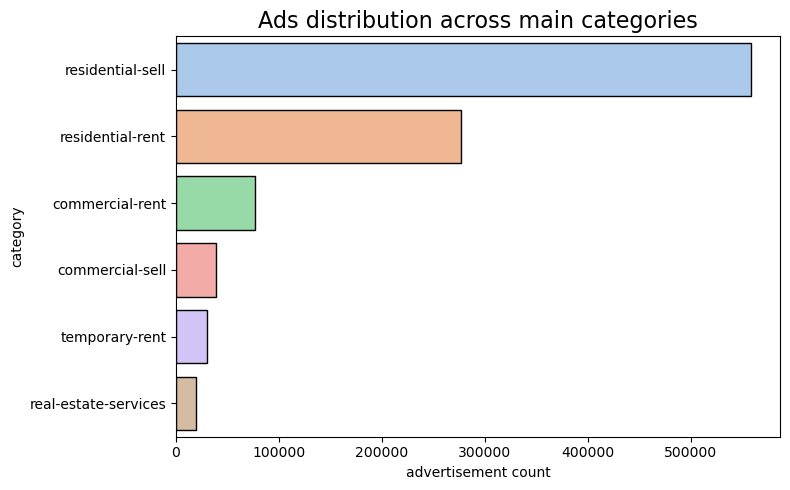

In [5]:
plt.figure(figsize=(8,5))
sns.barplot(x=cat2_count.values, y=cat2_count.index, palette="pastel", edgecolor="black")
plt.title(f"Ads distribution across main categories", fontsize=16)
plt.xlabel("advertisement count")
plt.ylabel("category")
plt.tight_layout()
plt.show()

/var/folders/v0/w36qy1cd65nfs65v4_tcfps00000gn/T/ipykernel_5467/163647706.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat3_count.values, y=cat3_count.index, palette="pastel", edgecolor="black")


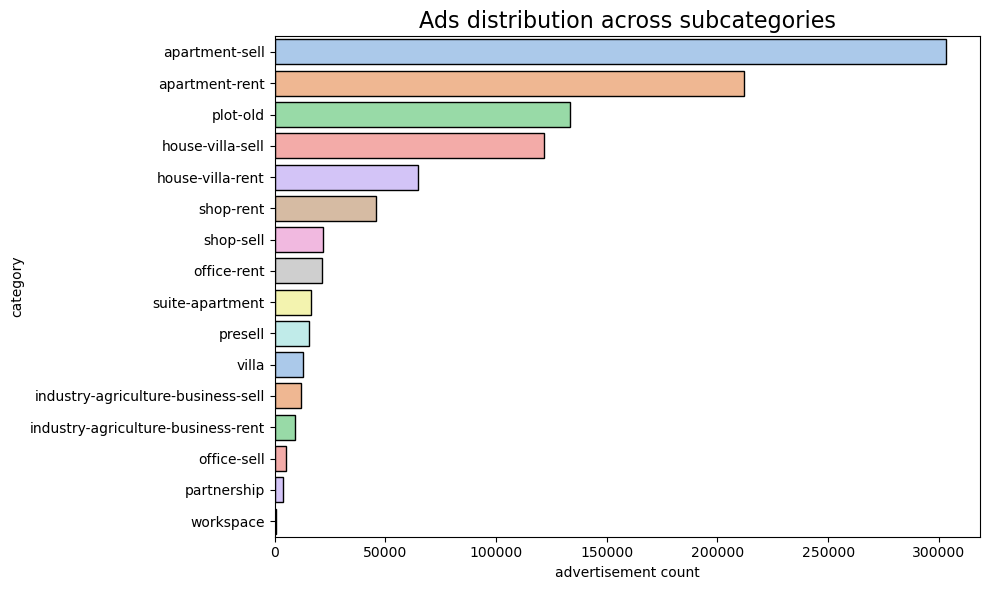

In [6]:
plt.figure(figsize=(10,6))
sns.barplot(x=cat3_count.values, y=cat3_count.index, palette="pastel", edgecolor="black")
plt.title(f"Ads distribution across subcategories", fontsize=16)
plt.xlabel("advertisement count")
plt.ylabel("category")
plt.tight_layout()
plt.show()

## 2. Plotting the histogram of the year built

/var/folders/v0/w36qy1cd65nfs65v4_tcfps00000gn/T/ipykernel_5467/17396617.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cons_year.index, y=cons_year.values, palette="pastel", edgecolor="black")


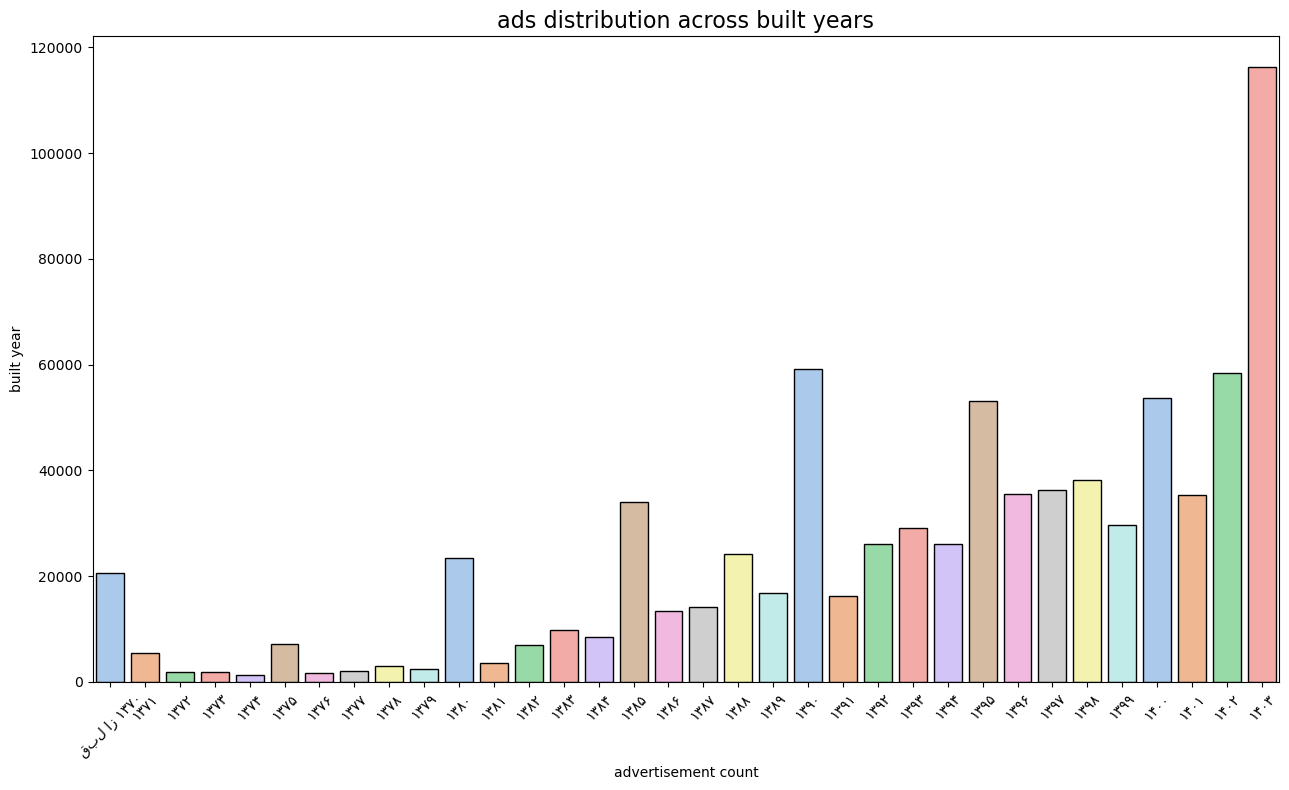

In [7]:
cons_year = divar["construction_year"].value_counts().sort_index()

plt.figure(figsize=(13, 8))
sns.barplot(x=cons_year.index, y=cons_year.values, palette="pastel", edgecolor="black")
plt.title(f"ads distribution across built years", fontsize=16)
plt.xlabel("advertisement count")
plt.xticks(rotation=45)
plt.ylabel("built year")
plt.tight_layout()
plt.show()

## 3. Number of sale and rental ads over different months

category 2 contains detailed information (e.g. residential, service, commercial), which we do not need. Instead, we need a broader category that only showes whether an advertisement is for **sale** or **rent**. So, the function below categorize advertisements into: </br>
 sale, rent, and others. </br>
Then we'll their distributions over different months.

In [8]:
def sell_rent(ad_type):
    if not isinstance(ad_type, str):
        return "other"
    ad_type = ad_type.lower()
    if "sell" in ad_type:
        return "sale"
    elif "rent" in ad_type:
        return "rental"
    else:
        return "other"

In [9]:
divar["created_at_month"] = pd.to_datetime(divar["created_at_month"])
divar["Gregorian_month"] = divar["created_at_month"].dt.month

divar['ads_type'] = divar['cat2_slug'].apply(sell_rent)
divar_filtered = divar[divar['ads_type'] != 'other']

rent_sell_per_month = divar_filtered[["Gregorian_month", "ads_type"]].value_counts().reset_index()
rent_sell_per_month.head(3)

,Gregorian_month,ads_type,count
0,11,sale,77369
1,12,sale,75678
2,10,sale,75298


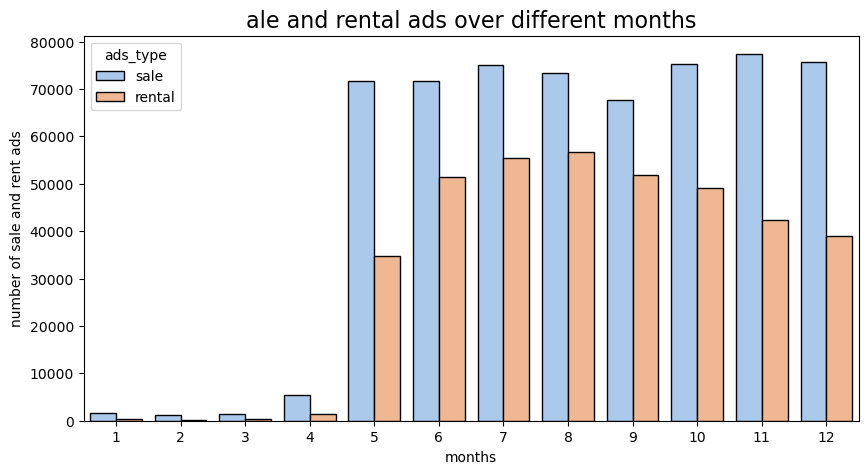

In [10]:
plt.figure(figsize=(10, 5))
sns.barplot(data=rent_sell_per_month, x="Gregorian_month", y="count", hue="ads_type", palette="pastel", edgecolor="black")
plt.title("ale and rental ads over different months", fontsize=16)
plt.xlabel("months")
plt.ylabel("number of sale and rent ads")
plt.show()

## 4. Price value distribution only for sale advertisements

In [11]:
sale_prices = divar[divar["ads_type"]=="sale"]["price_value"].reset_index()
sale_prices.describe()

,index,price_value
count,597569.000000,5.670910e+05
mean,500297.529656,1.738937e+10
std,288698.942635,5.885226e+11
min,1.000000,0.000000e+00
25%,250292.000000,1.400000e+09
50%,500606.000000,2.830000e+09
75%,750221.000000,5.900000e+09
max,999997.000000,1.000000e+14


/opt/anaconda3/envs/quera/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


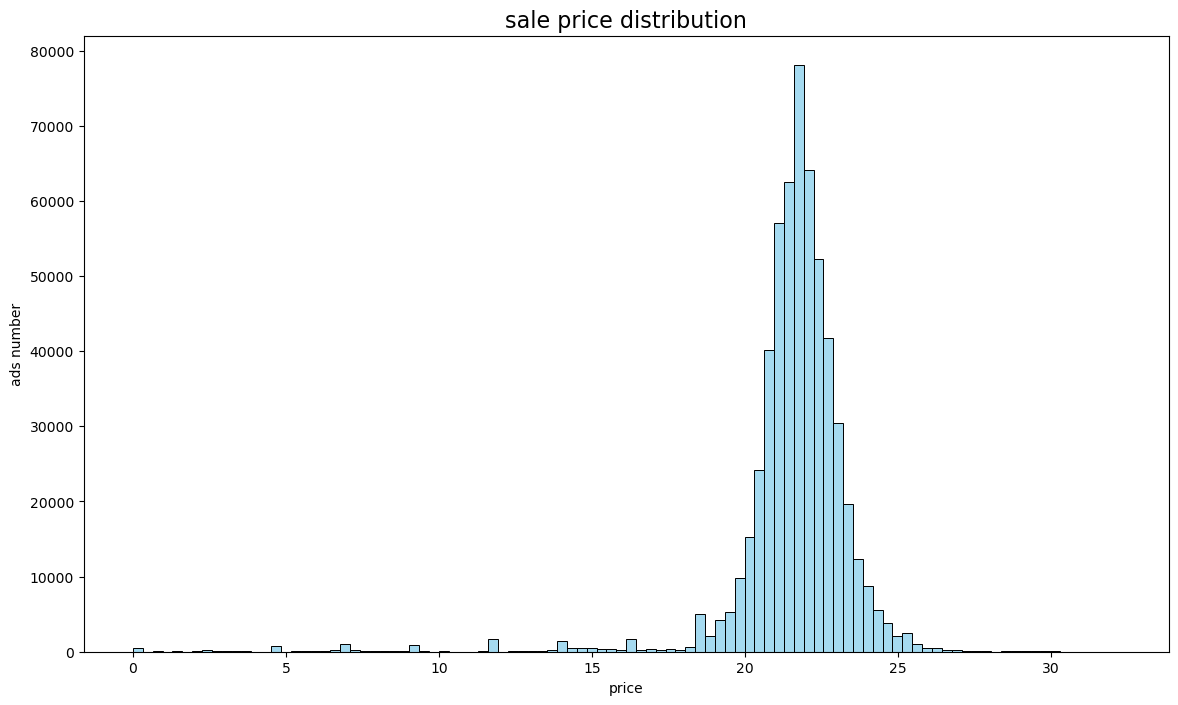

In [12]:
sale_prices = divar[divar["ads_type"]=="sale"]["price_value"]
plt.figure(figsize=(14,8))

sns.histplot(np.log(sale_prices), bins=100, color="skyblue")

plt.title("sale price distribution", fontsize=16)
plt.xlabel("price")
plt.ylabel("ads number")
plt.show()

## 6. Trend of average rent per month

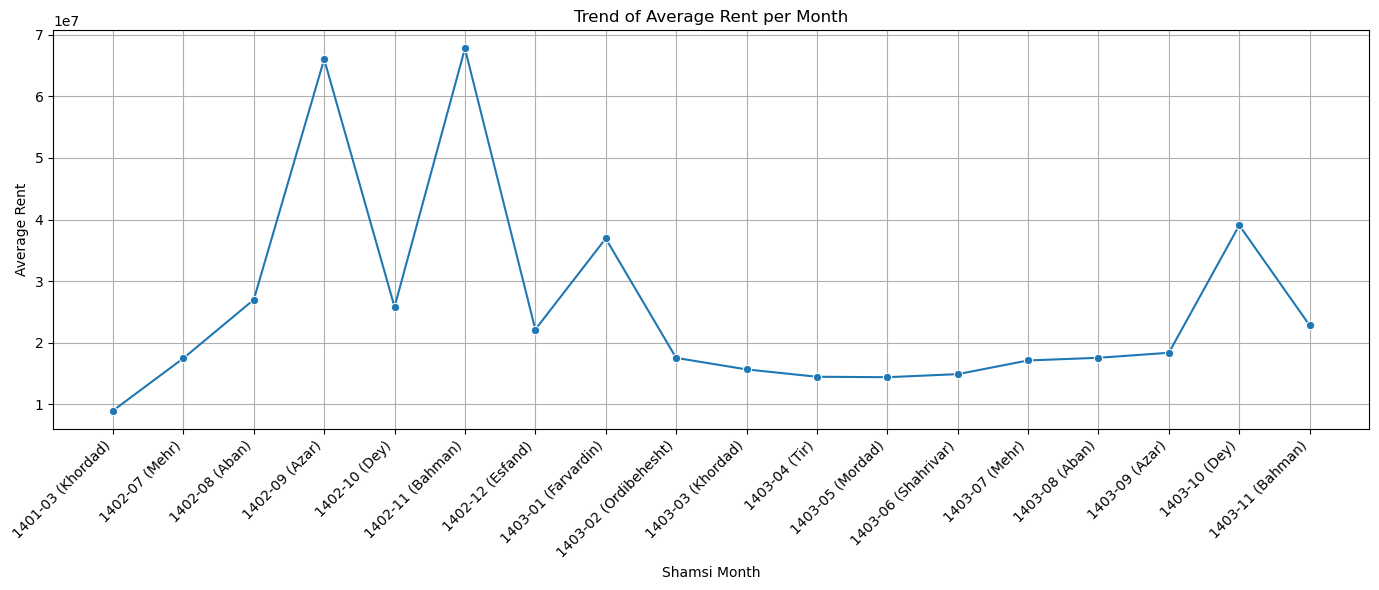

In [13]:
df_rent = divar.copy()
df_rent['created_at_month'] = pd.to_datetime(df_rent['created_at_month'], errors='coerce')
df_rent = df_rent[df_rent['transformed_rent'].notna()]
months_finglish = [
    "Farvardin","Ordibehesht","Khordad","Tir","Mordad","Shahrivar",
    "Mehr","Aban","Azar","Dey","Bahman","Esfand"
]

def to_jalali_finglish(date):
    jd = jdatetime.date.fromgregorian(date=date)
    month_name = months_finglish[jd.month-1]
    return f"{jd.year}-{jd.month:02d} ({month_name})"
df_rent['shamsi_month'] = df_rent['created_at_month'].apply(to_jalali_finglish)
monthly_mean_rent = df_rent.groupby('shamsi_month')['transformed_rent'].mean().reset_index()
monthly_mean_rent['year_month_sort'] = monthly_mean_rent['shamsi_month'].apply(
    lambda x: int(x.split('-')[0])*12 + int(x.split('-')[1].split()[0])
)
monthly_mean_rent = monthly_mean_rent.sort_values('year_month_sort')
plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_mean_rent, x='shamsi_month', y='transformed_rent', marker='o')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Shamsi Month')
plt.ylabel('Average Rent')
plt.title('Trend of Average Rent per Month')
plt.grid(True)
plt.tight_layout()
plt.show()

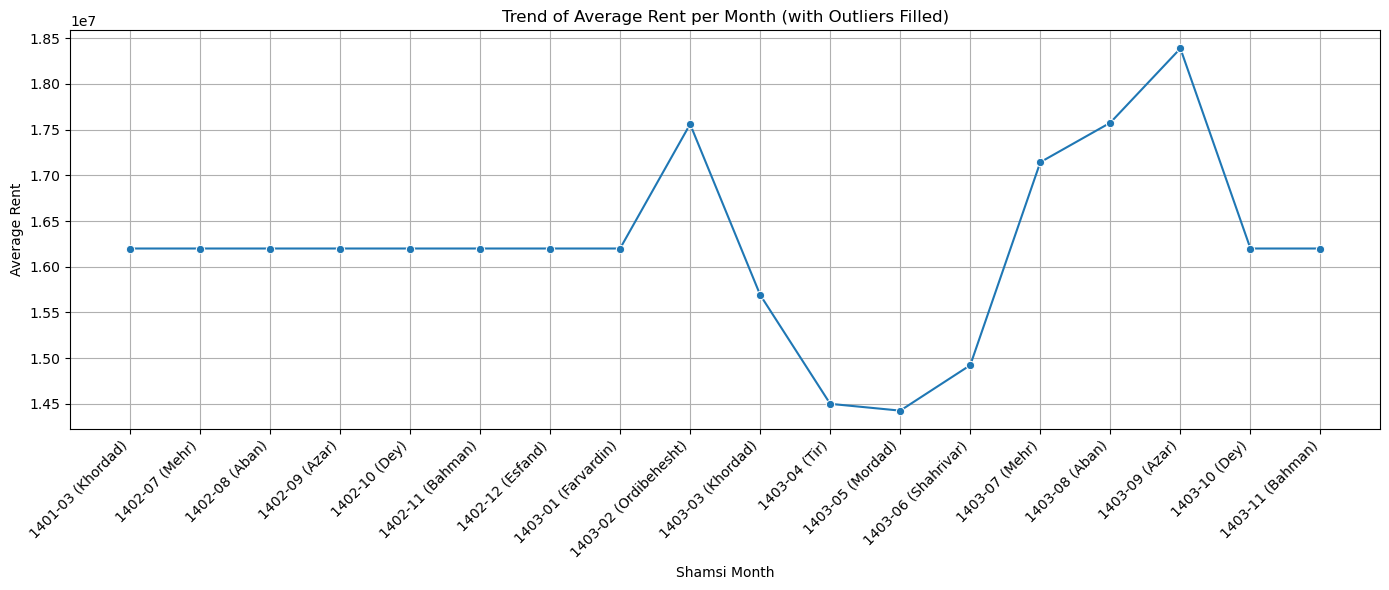

In [14]:
overall_mean_rent = df_rent['transformed_rent'].mean()
month_counts = df_rent['shamsi_month'].value_counts()
min_count = 1000
def fill_small_months(row):
    if month_counts[row['shamsi_month']] < min_count:
        return overall_mean_rent
    else:
        return row['transformed_rent']
df_rent['transformed_rent_filled'] = df_rent.apply(fill_small_months, axis=1)
monthly_mean_rent = df_rent.groupby('shamsi_month')['transformed_rent_filled'].mean().reset_index()
monthly_mean_rent['year_month_sort'] = monthly_mean_rent['shamsi_month'].apply(
    lambda x: int(x.split('-')[0])*12 + int(x.split('-')[1].split()[0])
)
monthly_mean_rent = monthly_mean_rent.sort_values('year_month_sort')
plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_mean_rent, x='shamsi_month', y='transformed_rent_filled', marker='o')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Shamsi Month')
plt.ylabel('Average Rent')
plt.title('Trend of Average Rent per Month (with Outliers Filled)')
plt.grid(True)
plt.tight_layout()
plt.show()

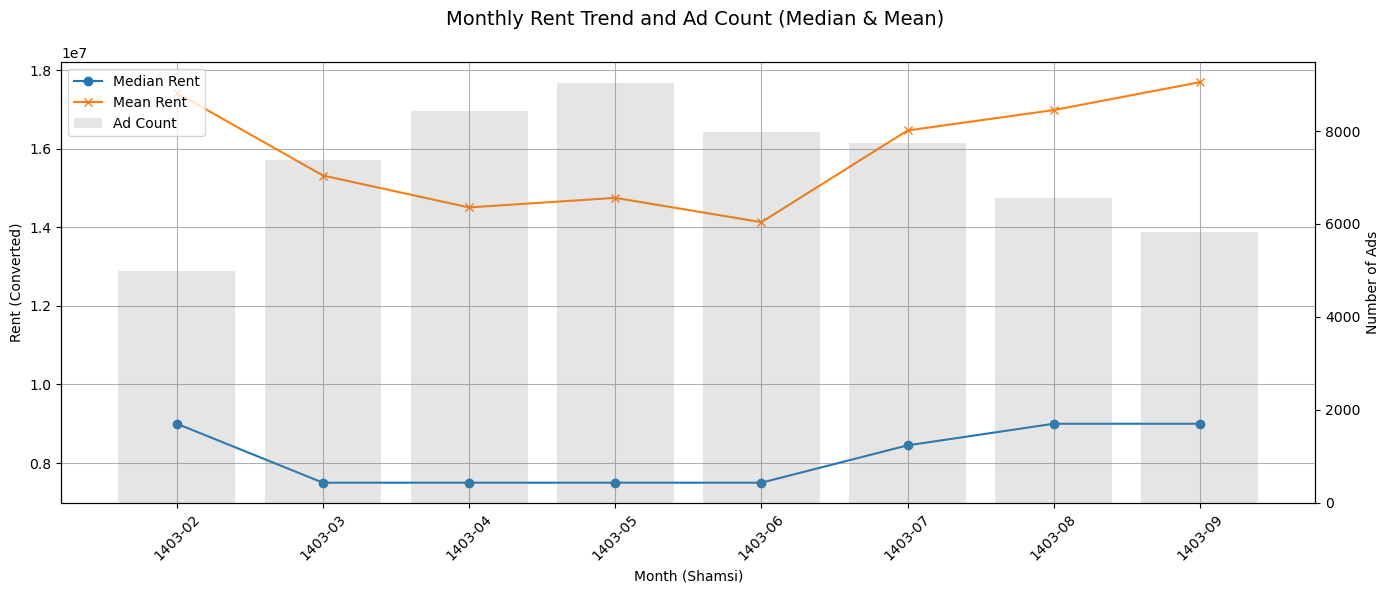

In [15]:
df_rent_valid = df_rent[(df_rent['transformed_rent'].notna()) & (df_rent['transformed_rent'] > 0)].copy()
df_rent_valid['year_month'] = df_rent_valid['created_at_month'].dt.to_period('M')
monthly_count = df_rent_valid.groupby('year_month').size().reset_index(name='count')
valid_months = monthly_count[monthly_count['count'] >= 500]['year_month']
df_rent_filtered = df_rent_valid[df_rent_valid['year_month'].isin(valid_months)].copy()
q_low = df_rent_filtered['transformed_rent'].quantile(0.01)
q_high = df_rent_filtered['transformed_rent'].quantile(0.99)
df_rent_filtered = df_rent_filtered[
    (df_rent_filtered['transformed_rent'] >= q_low) &
    (df_rent_filtered['transformed_rent'] <= q_high)
]
monthly_stats = df_rent_filtered.groupby('year_month')['transformed_rent'].agg(['median', 'mean']).reset_index()
monthly_stats = monthly_stats.sort_values('year_month')
monthly_stats = monthly_stats.merge(
    df_rent_filtered.groupby('year_month').size().reset_index(name='count'),
    on='year_month'
)
def to_persian_month(period):
    date = period.to_timestamp()
    jdate = jdatetime.date.fromgregorian(date=date)
    return f"{jdate.year}-{jdate.month:02d}"
monthly_stats['persian_month'] = monthly_stats['year_month'].apply(to_persian_month)
fig, ax1 = plt.subplots(figsize=(14,6))
ax1.plot(monthly_stats['persian_month'], monthly_stats['median'], marker='o', color='tab:blue', label='Median Rent')
ax1.plot(monthly_stats['persian_month'], monthly_stats['mean'], marker='x', color='tab:orange', label='Mean Rent')
ax1.set_xlabel('Month (Shamsi)')
ax1.set_ylabel('Rent (Converted)')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True)
ax2 = ax1.twinx()
ax2.bar(monthly_stats['persian_month'], monthly_stats['count'], alpha=0.2, color='gray', label='Ad Count')
ax2.set_ylabel('Number of Ads')
fig.suptitle('Monthly Rent Trend and Ad Count (Median & Mean)', fontsize=14)
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc='upper left')
plt.tight_layout()
plt.show()

## 7. Real Price Index Analysis (1400–1403)

In [16]:
divar_1 = divar.copy()
divar_1["created_at_month"] = pd.to_datetime(divar_1["created_at_month"])
divar_1["year_shamsi"] = divar_1["created_at_month"].apply(lambda x: jdatetime.date.fromgregorian(date=x.date()).year)
divar_00_to_03 = divar_1[divar_1["year_shamsi"].between(1400, 1403)]
mean_price_year = divar_00_to_03.groupby("year_shamsi")["price_value"].mean()
overall_mean = mean_price_year.mean()
real_price_index = mean_price_year / overall_mean
real_price_index

year_shamsi
1400    0.094312
1401    1.664059
1402    0.700170
1403    1.541459
Name: price_value, dtype: float64

| Year | Index | Interpretation |
|------|-------|----------------|
| 1400 | 0.094 | Significantly below the average |
| 1401 | 1.664 | Sharp increase in real price |
| 1402 | 0.700 | Decrease compared to the previous year |
| 1403 | 1.541 | Increase again, above average |

The results indicate that the real price index of housing from 1400 to 1403 exhibits a fluctuating pattern. While the index in 1400 was significantly below the period average, in 1401 and 1403 it reached levels above the average. To conclude, although prices did not increase uniformly, there was an overall increase in the real value of the housing market in the later years.

The very low index value of 0.094 in 1400 is unusual. This could be due to A smaller number of listings in 1400 and Some missing or zero prices 